In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("palembang.csv")
df.head()

,created_at,text,tweet_en
0,Fri Jan 27 14:55:22 +0000 2017,Data Resmi Puskesmas di Kota Palembang Provins...,"Official Data of Puskesmas in Palembang City, ..."
1,Mon Aug 11 07:57:11 +0000 2014,Dinkes imbau pedagang jual makanan sehat: Dina...,Health Office urges merchants to sell healthy ...
2,Mon Jun 15 08:30:28 +0000 2020,Warga di komplek Bumi Sako Damai Kota Palemban...,Residents in the Bumi Sako Damai complex in Pa...
3,Mon Mar 07 09:47:35 +0000 2016,Status Terakhir di WA Dokter Cantik Asal Balik...,"The last status in WA, a beautiful doctor from..."
4,Fri Jun 21 12:27:10 +0000 2019,"Assalamu'alaikum SanakDulur DPPKB, Hari Jumat ...","Assalamu'alaikum SanakDulur DPPKB, Friday (21/..."


In [3]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['tweet_en'] = df['tweet_en'].apply(cleanTxt)
df['text'] = df['text'].apply(cleanTxt)
df

,created_at,text,tweet_en
0,Fri Jan 27 14:55:22 +0000 2017,Data Resmi Puskesmas di Kota Palembang Provins...,"Official Data of Puskesmas in Palembang City, ..."
1,Mon Aug 11 07:57:11 +0000 2014,Dinkes imbau pedagang jual makanan sehat: Dina...,Health Office urges merchants to sell healthy ...
2,Mon Jun 15 08:30:28 +0000 2020,Warga di komplek Bumi Sako Damai Kota Palemban...,Residents in the Bumi Sako Damai complex in Pa...
3,Mon Mar 07 09:47:35 +0000 2016,Status Terakhir di WA Dokter Cantik Asal Balik...,"The last status in WA, a beautiful doctor from..."
4,Fri Jun 21 12:27:10 +0000 2019,"Assalamu'alaikum SanakDulur DPPKB, Hari Jumat ...","Assalamu'alaikum SanakDulur DPPKB, Friday (21/..."
...,...,...,...
245,Mon Sep 07 09:00:04 +0000 2015,Kota Palembang Diusulkan Jadi Kota Sehat,Palembang City Is Proposed To Be A Healthy City
246,Mon Jul 11 09:09:00 +0000 2016,Rumah Sakit di Kota Palembang Terima Ancaman T...,Hospital in Palembang City Receives Bomb Terro...
247,Fri Feb 06 16:12:56 +0000 2015,Palembang - Palembang belum status KLB DBD: Pe...,Palembang - Palembang is not yet a DHF outbrea...
248,Thu Jan 18 06:03:25 +0000 2018,PindangPatin Pemerintah Kota Palembang Sumater...,PindangPatin Palembang City Government of Sout...


In [4]:
#mendapatkan subjectivity dan polarity
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity)
df['Polarity'] = df['tweet_en'].apply(getPolarity)

In [5]:
df

,created_at,text,tweet_en,Subjectivity,Polarity
0,Fri Jan 27 14:55:22 +0000 2017,Data Resmi Puskesmas di Kota Palembang Provins...,"Official Data of Puskesmas in Palembang City, ...",0.000000,0.000000
1,Mon Aug 11 07:57:11 +0000 2014,Dinkes imbau pedagang jual makanan sehat: Dina...,Health Office urges merchants to sell healthy ...,0.500000,0.500000
2,Mon Jun 15 08:30:28 +0000 2020,Warga di komplek Bumi Sako Damai Kota Palemban...,Residents in the Bumi Sako Damai complex in Pa...,0.400000,-0.300000
3,Mon Mar 07 09:47:35 +0000 2016,Status Terakhir di WA Dokter Cantik Asal Balik...,"The last status in WA, a beautiful doctor from...",0.372222,0.216667
4,Fri Jun 21 12:27:10 +0000 2019,"Assalamu'alaikum SanakDulur DPPKB, Hari Jumat ...","Assalamu'alaikum SanakDulur DPPKB, Friday (21/...",0.000000,0.000000
...,...,...,...,...,...
245,Mon Sep 07 09:00:04 +0000 2015,Kota Palembang Diusulkan Jadi Kota Sehat,Palembang City Is Proposed To Be A Healthy City,0.500000,0.500000
246,Mon Jul 11 09:09:00 +0000 2016,Rumah Sakit di Kota Palembang Terima Ancaman T...,Hospital in Palembang City Receives Bomb Terro...,0.000000,0.000000
247,Fri Feb 06 16:12:56 +0000 2015,Palembang - Palembang belum status KLB DBD: Pe...,Palembang - Palembang is not yet a DHF outbrea...,0.100000,0.000000
248,Thu Jan 18 06:03:25 +0000 2018,PindangPatin Pemerintah Kota Palembang Sumater...,PindangPatin Palembang City Government of Sout...,0.000000,0.000000


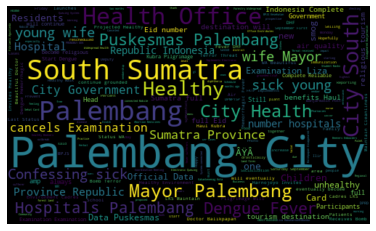

In [6]:
#wordcloud
allwords = ' '.join([twts for twts in df['tweet_en']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [7]:
#mendapatkan nilai sentimen
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,created_at,text,tweet_en,Subjectivity,Polarity,Sentiment
0,Fri Jan 27 14:55:22 +0000 2017,Data Resmi Puskesmas di Kota Palembang Provins...,"Official Data of Puskesmas in Palembang City, ...",0.000000,0.000000,Neutral
1,Mon Aug 11 07:57:11 +0000 2014,Dinkes imbau pedagang jual makanan sehat: Dina...,Health Office urges merchants to sell healthy ...,0.500000,0.500000,Positive
2,Mon Jun 15 08:30:28 +0000 2020,Warga di komplek Bumi Sako Damai Kota Palemban...,Residents in the Bumi Sako Damai complex in Pa...,0.400000,-0.300000,Negative
3,Mon Mar 07 09:47:35 +0000 2016,Status Terakhir di WA Dokter Cantik Asal Balik...,"The last status in WA, a beautiful doctor from...",0.372222,0.216667,Positive
4,Fri Jun 21 12:27:10 +0000 2019,"Assalamu'alaikum SanakDulur DPPKB, Hari Jumat ...","Assalamu'alaikum SanakDulur DPPKB, Friday (21/...",0.000000,0.000000,Neutral
...,...,...,...,...,...,...
245,Mon Sep 07 09:00:04 +0000 2015,Kota Palembang Diusulkan Jadi Kota Sehat,Palembang City Is Proposed To Be A Healthy City,0.500000,0.500000,Positive
246,Mon Jul 11 09:09:00 +0000 2016,Rumah Sakit di Kota Palembang Terima Ancaman T...,Hospital in Palembang City Receives Bomb Terro...,0.000000,0.000000,Neutral
247,Fri Feb 06 16:12:56 +0000 2015,Palembang - Palembang belum status KLB DBD: Pe...,Palembang - Palembang is not yet a DHF outbrea...,0.100000,0.000000,Neutral
248,Thu Jan 18 06:03:25 +0000 2018,PindangPatin Pemerintah Kota Palembang Sumater...,PindangPatin Palembang City Government of Sout...,0.000000,0.000000,Neutral


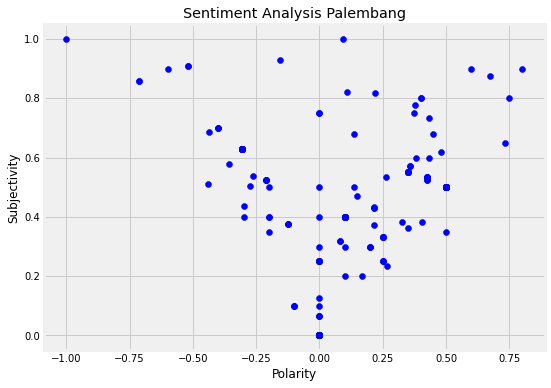

In [8]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Palembang")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

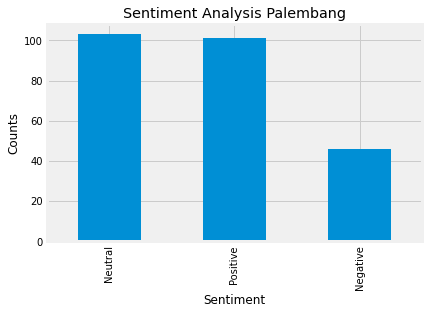

In [9]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis Palembang")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [10]:
df_final = df[['created_at', 'text', 'Subjectivity', 'Polarity', 'Sentiment']]
df_final

,created_at,text,Subjectivity,Polarity,Sentiment
0,Fri Jan 27 14:55:22 +0000 2017,Data Resmi Puskesmas di Kota Palembang Provins...,0.000000,0.000000,Neutral
1,Mon Aug 11 07:57:11 +0000 2014,Dinkes imbau pedagang jual makanan sehat: Dina...,0.500000,0.500000,Positive
2,Mon Jun 15 08:30:28 +0000 2020,Warga di komplek Bumi Sako Damai Kota Palemban...,0.400000,-0.300000,Negative
3,Mon Mar 07 09:47:35 +0000 2016,Status Terakhir di WA Dokter Cantik Asal Balik...,0.372222,0.216667,Positive
4,Fri Jun 21 12:27:10 +0000 2019,"Assalamu'alaikum SanakDulur DPPKB, Hari Jumat ...",0.000000,0.000000,Neutral
...,...,...,...,...,...
245,Mon Sep 07 09:00:04 +0000 2015,Kota Palembang Diusulkan Jadi Kota Sehat,0.500000,0.500000,Positive
246,Mon Jul 11 09:09:00 +0000 2016,Rumah Sakit di Kota Palembang Terima Ancaman T...,0.000000,0.000000,Neutral
247,Fri Feb 06 16:12:56 +0000 2015,Palembang - Palembang belum status KLB DBD: Pe...,0.100000,0.000000,Neutral
248,Thu Jan 18 06:03:25 +0000 2018,PindangPatin Pemerintah Kota Palembang Sumater...,0.000000,0.000000,Neutral


In [11]:
df_final.to_csv("sentiment_palembang.csv")